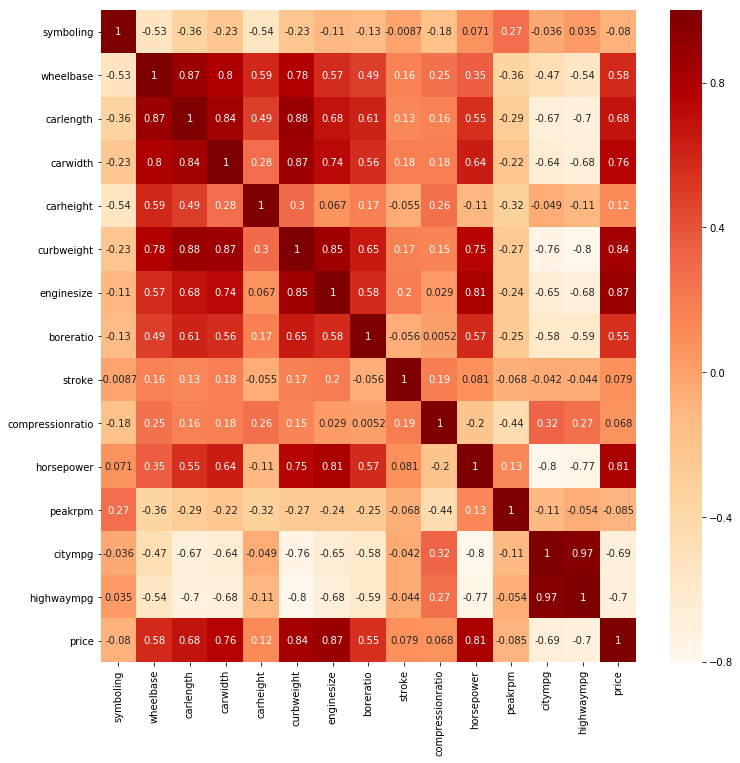

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.rcParams["figure.figsize"]=12,12

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

cars = pd.read_csv('./CarPrice_Assignment.csv')
CompanyName = cars["CarName"].apply(lambda x: x.split(" ")[0])

#Insert into dataframe
cars.insert(3, "CompanyName", CompanyName)
cars.drop(["CarName"], axis=1, inplace = True)
cars.drop(['car_ID'],axis=1,inplace=True)

#Check for spelling errors in CompanyName
cars.CompanyName.unique()

#Correct the spelling errors
cars = cars.replace(to_replace = "maxda", value = "mazda")
cars = cars.replace(to_replace = "Nissan", value = "nissan")
cars = cars.replace(to_replace = "porcshce", value = "porsche")
cars = cars.replace(to_replace = "toyouta", value = "toyota")
cars = cars.replace(to_replace = "vokswagen", value = "volkswagen")
cars = cars.replace(to_replace = "vw", value = "volkswagen")

#Look at correlation
sns.heatmap(cars.corr(),cmap="OrRd",annot=True)
plt.show()


#Keep only variables with high correlation to price
cars = cars.drop(["peakrpm", "compressionratio", "stroke", "carheight", "symboling"],axis=1)

#Look at correlation between some other variables
vars1 = ['wheelbase', 'carlength', 'carwidth','curbweight']
vars2 = ['citympg','highwaympg']
vars3 = ['enginesize','boreratio','horsepower']
#sns.heatmap(cars.filter(vars1).corr(),cmap="OrRd",annot=True)
#plt.show()
#sns.heatmap(cars.filter(vars2).corr(),cmap="OrRd",annot=True)
#plt.show()
#sns.heatmap(cars.filter(vars3).corr(),cmap="OrRd",annot=True)
#plt.show()

#We only need one of those variables that are highly correlated
cars.drop(["citympg"], axis=1, inplace = True)
cars.drop(['wheelbase'],axis=1,inplace=True)
cars.drop(['carlength'],axis=1,inplace=True)
cars.drop(['carwidth'],axis=1,inplace=True)
cars.drop(['horsepower'],axis=1,inplace=True)

cars = pd.get_dummies(cars)


#Keeping only Buick
remove = ['CompanyName_alfa-romero', 'CompanyName_audi', 'CompanyName_bmw','CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_jaguar',
       'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi',
       'CompanyName_nissan', 'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota', 'CompanyName_volkswagen',
       'CompanyName_volvo',]
cars.drop(remove, axis = 1, inplace = True)


#Keeping only fuelsystem with high correlation to price
remove = ['fuelsystem_1bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']
cars.drop(remove, axis = 1, inplace = True)

#Remove all engine types, none with >0.5 correlation to price
remove = ['enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor']
cars.drop(remove, axis = 1, inplace = True)

#Remove all cylinders, none with >0.5 correlation to price
remove = ['cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']
cars.drop(remove, axis = 1, inplace = True)

#Remove all car types as well
remove = ['carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon']
cars.drop(remove, axis = 1, inplace = True)

#Removing the rest of the variables without high corr to price
remove = ['fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'drivewheel_4wd','enginelocation_front', 'enginelocation_rear',]
cars.drop(remove, axis = 1, inplace = True)

#sns.heatmap(cars.corr(),cmap="OrRd",annot=True)
#plt.show()


#Make dataframes for non linear relationships
nonlin = ['curbweight', 'enginesize', 'boreratio', 'highwaympg']

cars2 = cars.copy()
for feat in nonlin:
    cars2.insert(0,feat + "2", cars[feat]**2)

cars3 = cars2.copy()
for feat in nonlin:
    cars3.insert(0,feat + "3", cars[feat]**3)

cars4 = cars3.copy()
for feat in nonlin:
    cars4.insert(0,feat + "4", cars[feat]**4)

cars5 = cars4.copy()
for feat in nonlin:
    cars5.insert(0,feat + "5", cars[feat]**5)

cars6 = cars5.copy()
for feat in nonlin:
    cars6.insert(0,feat + "6", cars[feat]**6)

cars7 = cars6.copy()
for feat in nonlin:
    cars7.insert(0,feat + "7", cars[feat]**7)


In [3]:
#Split into train and test and scale
cars_train, cars_test = train_test_split(cars, test_size = 0.3)
cars2_train, cars2_test = train_test_split(cars3, test_size = 0.3)
cars3_train, cars3_test = train_test_split(cars3, test_size = 0.3)
cars4_train, cars4_test = train_test_split(cars4, test_size = 0.3)
cars5_train, cars5_test = train_test_split(cars5, test_size = 0.3)
cars6_train, cars6_test = train_test_split(cars6, test_size = 0.3)
cars7_train, cars7_test = train_test_split(cars7, test_size = 0.3)
"""
cars_train_scaled, cars_test_scaled = scale_data(cars_train, cars_test)
cars2_train_scaled, cars2_test_scaled = scale_data(cars2_train, cars2_test)
cars3_train_scaled, cars3_test_scaled = scale_data(cars3_train, cars3_test)
cars4_train_scaled, cars4_test_scaled = scale_data(cars4_train, cars4_test)
cars5_train_scaled, cars5_test_scaled = scale_data(cars5_train, cars5_test)
cars6_train_scaled, cars6_test_scaled = scale_data(cars6_train, cars6_test)
"""

'\ncars_train_scaled, cars_test_scaled = scale_data(cars_train, cars_test)\ncars2_train_scaled, cars2_test_scaled = scale_data(cars2_train, cars2_test)\ncars3_train_scaled, cars3_test_scaled = scale_data(cars3_train, cars3_test)\ncars4_train_scaled, cars4_test_scaled = scale_data(cars4_train, cars4_test)\ncars5_train_scaled, cars5_test_scaled = scale_data(cars5_train, cars5_test)\ncars6_train_scaled, cars6_test_scaled = scale_data(cars6_train, cars6_test)\n'

In [4]:
def scale_data_df(df_train, df_test):
    #Columns in df
    columns = []
    for i in df_train:
        columns.append(i)

    #Columns to scale
    col_to_scale = columns[:-5]

    scaler = StandardScaler()
    scaler.fit(df_train[col_to_scale])
    train_scaler = scaler.transform(df_train.loc[:,col_to_scale])
    df_train_scaled = df_train.copy()
    df_train_scaled[col_to_scale] = train_scaler

    test_scaler = scaler.transform(df_test.loc[:,col_to_scale])
    df_test_scaled = df_test.copy()
    df_test_scaled[col_to_scale] = test_scaler

    return df_train_scaled, df_test_scaled

def scale_data_arr(X1,X2, scale_type = StandardScaler, with_std=True):
    try:
        X1 =X1[:,:]
        X2 =X2[:,:]
        scaler = StandardScaler(with_std=with_std)
        scaler.fit(X1)
        X1 = scaler.transform(X1)
        X2 = scaler.transform(X2)
    except:
        scaler = StandardScaler(with_std=with_std)
        scaler.fit(X1.reshape(-1,1))
        X1 = scaler.transform(X1.reshape(-1,1))
        X2 = scaler.transform(X2.reshape(-1,1))
        X1 =X1.flatten()
        X2 =X2.flatten()

    return X1, X2

def mse(x1, x2):
    return np.mean((x1-x2)**2)

def bootstrap(X,z): #Resamples with replacement
    n = len(z)
    data = np.random.randint(0,n,n)
    X_new = np.array(X)[data] #random chosen columns for new design matrix
    z_new = np.array(z)[data]
    return X_new, z_new
    
X.head()

NameError: name 'X' is not defined

In [158]:
X_train = cars_train_scaled.loc[:, cars_train_scaled.columns != 'price']
y_train = cars_train_scaled.loc[:,cars_train_scaled.columns == 'price']
X_test = cars_test_scaled.loc[:, cars_test_scaled.columns != 'price']
y_test = cars_test_scaled.loc[:,cars_test_scaled.columns == 'price']

X_train2 = cars2_train_scaled.loc[:, cars2_train_scaled.columns != 'price']
y_train2 = cars2_train_scaled.loc[:,cars2_train_scaled.columns == 'price']
X_test2 = cars2_test_scaled.loc[:, cars2_test_scaled.columns != 'price']
y_test2 = cars2_test_scaled.loc[:,cars2_test_scaled.columns == 'price']

X_train3 = cars3_train_scaled.loc[:, cars3_train_scaled.columns != 'price']
y_train3 = cars3_train_scaled.loc[:,cars3_train_scaled.columns == 'price']
X_test3 = cars3_test_scaled.loc[:, cars3_test_scaled.columns != 'price']
y_test3 = cars3_test_scaled.loc[:,cars3_test_scaled.columns == 'price']

X_train4 = cars4_train_scaled.loc[:, cars4_train_scaled.columns != 'price']
y_train4 = cars4_train_scaled.loc[:,cars4_train_scaled.columns == 'price']
X_test4 = cars4_test_scaled.loc[:, cars4_test_scaled.columns != 'price']
y_test4 = cars4_test_scaled.loc[:,cars4_test_scaled.columns == 'price']

X_train5 = cars5_train_scaled.loc[:, cars5_train_scaled.columns != 'price']
y_train5 = cars5_train_scaled.loc[:,cars5_train_scaled.columns == 'price']
X_test5 = cars5_test_scaled.loc[:, cars5_test_scaled.columns != 'price']
y_test5 = cars5_test_scaled.loc[:,cars5_test_scaled.columns == 'price']


In [193]:
linreg1 = LinearRegression().fit(X_train, y_train)
y_tilde1 = linreg1.predict(X_train)
y_predict1 = linreg1.predict(X_test)
mse_train1 = mse(y_tilde1, y_train)
mse_test1 = mse(y_predict1, y_test)
print("R2 train degree 1: ", linreg1.score(X_train, y_train))
print("R2 test degree 1:  ", linreg1.score(X_test, y_test))
print("MSE Train degree 1: ", mse_train1[0])
print("MSE Test degree 1: ", mse_test1[0])
print("-----------------")

linreg2 = LinearRegression().fit(X_train2, y_train2)
y_tilde2 = linreg2.predict(X_train2)
y_predict2 = linreg2.predict(X_test2)
mse_train2 = mse(y_tilde2, y_train2)
mse_test2 = mse(y_predict2, y_test2)
print("R2 train degree 2: ", linreg2.score(X_train2, y_train2))
print("R2 test degree 2:  ", linreg2.score(X_test2, y_test2))
print("MSE Train degree 2: ", mse_train2[0])
print("MSE Test degree 2: ", mse_test2[0])
print("-----------------")

linreg3 = LinearRegression().fit(X_train3, y_train3)
y_tilde3 = linreg3.predict(X_train3)
y_predict3 = linreg3.predict(X_test3)
mse_train3 = mse(y_tilde3, y_train3)
mse_test3 = mse(y_predict3, y_test3)
print("R2 train degree 3: ", linreg3.score(X_train3, y_train3))
print("R2 test degree 3:  ", linreg3.score(X_test3, y_test3))
print("MSE Train degree 3: ", mse_train3[0])
print("MSE Test degree 3: ", mse_test3[0])
print("-----------------")

linreg4 = LinearRegression().fit(X_train4, y_train4)
y_tilde4 = linreg4.predict(X_train4)
y_predict4 = linreg4.predict(X_test4)
mse_train4 = mse(y_tilde4, y_train4)
mse_test4 = mse(y_predict4, y_test4)
print("R2 train degree 4: ", linreg4.score(X_train4, y_train4))
print("R2 test degree 4:  ", linreg4.score(X_test4, y_test4))
print("MSE Train degree 4: ", mse_train4[0])
print("MSE Test degree 4: ", mse_test4[0])
print("-----------------")

linreg5 = LinearRegression().fit(X_train5, y_train5)
y_tilde5 = linreg5.predict(X_train5)
y_predict5 = linreg5.predict(X_test5)
mse_train5 = mse(y_tilde5, y_train5)
mse_test5 = mse(y_predict5, y_test5)
print("R2 train degree 5: ", linreg5.score(X_train5, y_train5))
print("R2 test degree 5:  ", linreg5.score(X_test5, y_test5))
print("MSE Train degree 5: ", mse_train5[0])
print("MSE Test degree 5: ", mse_test5[0])


R2 train degree 1:  0.8381197246846676
R2 test degree 1:   -322.6740858755019


IndexError: invalid index to scalar variable.

In [5]:
#Make list with features sorted by complexity
features = []
features += nonlin
features += ['CompanyName_buick', 'drivewheel_fwd', 'drivewheel_rwd',
       'fuelsystem_2bbl', 'fuelsystem_mpfi']

for i in range(2,6):
    for j in nonlin:
        features.append(j+str(i))

In [15]:
#OLS

nb = 100
complexity = len(features)

X = cars5.loc[:, cars5.columns != "price"]
y = cars5.loc[:, cars5.columns == "price"]
MSE_train = np.zeros(complexity)
MSE_test = np.zeros(complexity)

for i in range(nb):
    for c in range(1,complexity+1):
        X_sample, y_sample  = bootstrap(np.array(X.loc[:,features[:c]]),np.array(y))
        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.2)
        X_train, X_test = scale_data_arr(X_train, X_test)
        y_train, y_test = scale_data_arr(y_train, y_test)
        linreg = LinearRegression().fit(X_train, y_train)
        y_tilde = linreg.predict(X_train)
        y_predict = linreg.predict(X_test)
        MSE_train[c-1] += mse(y_tilde, y_train)
        MSE_test[c-1] += mse(y_predict, y_test)

MSE_train /= nb; MSE_test /= nb



In [243]:
#Ridge

nb = 100
complexity = len(features)

X = cars5.loc[:, cars5.columns != "price"]
y = cars5.loc[:, cars5.columns == "price"]
MSE_train = np.zeros(complexity)
MSE_test = np.zeros(complexity)

for i in range(nb):
    for c in range(1,complexity+1):
        X_sample, y_sample  = bootstrap(np.array(X.loc[:,features[:c]]),np.array(y))
        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.2)
        X_train, X_test = scale_data_arr(X_train, X_test)
        y_train, y_test = scale_data_arr(y_train, y_test)
        linreg = Ridge(alpha = 0.001).fit(X_train, y_train)
        y_tilde = linreg.predict(X_train)
        y_predict = linreg.predict(X_test)
        MSE_train[c-1] += mse(y_tilde, y_train)
        MSE_test[c-1] += mse(y_predict, y_test)

MSE_train /= nb; MSE_test /= nb


In [255]:
#Lasso

nb = 100
complexity = len(features)

X = cars5.loc[:, cars5.columns != "price"]
y = cars5.loc[:, cars5.columns == "price"]
MSE_train = np.zeros(complexity)
MSE_test = np.zeros(complexity)

for i in range(nb):
    for c in range(1,complexity+1):
        X_sample, y_sample  = bootstrap(np.array(X.loc[:,features[:c]]),np.array(y))
        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.2)
        X_train, X_test = scale_data_arr(X_train, X_test)
        y_train, y_test = scale_data_arr(y_train, y_test)
        linreg = Lasso(alpha = 0.001, max_iter = 10000).fit(X_train, y_train)
        y_tilde = linreg.predict(X_train)
        y_predict = linreg.predict(X_test)
        MSE_train[c-1] += mse(y_tilde, y_train)
        MSE_test[c-1] += mse(y_predict, y_test)

MSE_train /= nb; MSE_test /= nb


C:\Users\bendi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bendi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bendi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bendi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

In [18]:
#Decision tree

nb = 100
complexity = len(features)

X = cars5.loc[:, cars5.columns != "price"]
y = cars5.loc[:, cars5.columns == "price"]
MSE_train = np.zeros(complexity)
MSE_test = np.zeros(complexity)

for i in range(nb):
    for c in range(1,complexity+1):
        X_sample, y_sample  = bootstrap(np.array(X.loc[:,features[:c]]),np.array(y))
        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.2)
        X_train, X_test = scale_data_arr(X_train, X_test)
        y_train, y_test = scale_data_arr(y_train, y_test)
        linreg = RandomForestRegressor().fit(X_train, y_train)
        y_tilde = linreg.predict(X_train)
        y_predict = linreg.predict(X_test)
        MSE_train[c-1] += mse(y_tilde, y_train)
        MSE_test[c-1] += mse(y_predict, y_test)

MSE_train /= nb; MSE_test /= nb


In [21]:
#Neural Network

nb = 10
complexity = len(features)

X = cars5.loc[:, cars5.columns != "price"]
y = cars5.loc[:, cars5.columns == "price"]
MSE_train = np.zeros(complexity)
MSE_test = np.zeros(complexity)

for i in range(nb):
    for c in range(1,complexity+1):
        X_sample, y_sample  = bootstrap(np.array(X.loc[:,features[:c]]),np.array(y))
        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.2)
        X_train, X_test = scale_data_arr(X_train, X_test)
        y_train, y_test = scale_data_arr(y_train, y_test)
        linreg = MLPRegressor(max_iter = 1000).fit(X_train, y_train)
        y_tilde = linreg.predict(X_train)
        y_predict = linreg.predict(X_test)
        MSE_train[c-1] += mse(y_tilde, y_train)
        MSE_test[c-1] += mse(y_predict, y_test)



MSE_train /= nb; MSE_test /= nb

C:\Users\bendi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bendi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bendi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bendi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

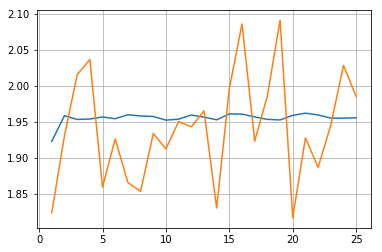

In [19]:
plt.plot(range(1,complexity+1), MSE_train)
plt.plot(range(1,complexity+1), MSE_test)
plt.grid()
#plt.ylim(0,0.5)


In [ ]:
X.loc[:,features[:16]]